In [2]:
import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np
import os
import scipy.io.wavfile as wavfile
from IPython.display import Audio

### **Loading 5 Data samples from each**

In [3]:
# Loading training data
base_dir = r"Signal Processing Datasets/BirdSongDataset/train"
cardinalis_dir = os.path.join(base_dir, 'CardinalisCardinalis')
melospiza_dir = os.path.join(base_dir, 'MelospizaMelodia')


In [4]:
# samples dictionary
samples = {}

for species, directory in zip(["Cardinalis Cardinalis", "Melospiza Melodia"],[cardinalis_dir, melospiza_dir]):
    samples[species] = []
    if os.path.isdir(directory):  
        for file_name in os.listdir(directory)[:5]:  # Loading 5 samples
            file_path = os.path.join(directory, file_name)
            sample_rate, audio_data = wavfile.read(file_path)
            samples[species].append((audio_data, sample_rate))
            print(f"Loaded {file_name} from {species} at sample rate {sample_rate} Hz")
            display(Audio(audio_data, rate=sample_rate))
    else:
        print(f"Directory {directory} does not exist.")

Loaded (1).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (10).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (100).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (11).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (12).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (1).wav from Melospiza Melodia at sample rate 22050 Hz


Loaded (10).wav from Melospiza Melodia at sample rate 22050 Hz


Loaded (100).wav from Melospiza Melodia at sample rate 22050 Hz


Loaded (11).wav from Melospiza Melodia at sample rate 22050 Hz


Loaded (12).wav from Melospiza Melodia at sample rate 22050 Hz


In [33]:
# STFT Analysis on the samples
def plot_spectrogram(audio_data, sample_rate, title, window='hann', nperseg=1024):
    # Compute STFT
    frequencies, times, Sxx = stft(audio_data, fs=sample_rate, window=window, nperseg=nperseg)
    
    # Plot the Spectrogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Sxx)), shading='gouraud')
    plt.title(f"Spectrogram of {title}")
    plt.ylabel("Frequency (Hz)")
    plt.xlabel("Time (s)")
    plt.colorbar(label="Magnitude (dB)")
    plt.show()

#### **Cardinalis Cardinalis 5 samples**

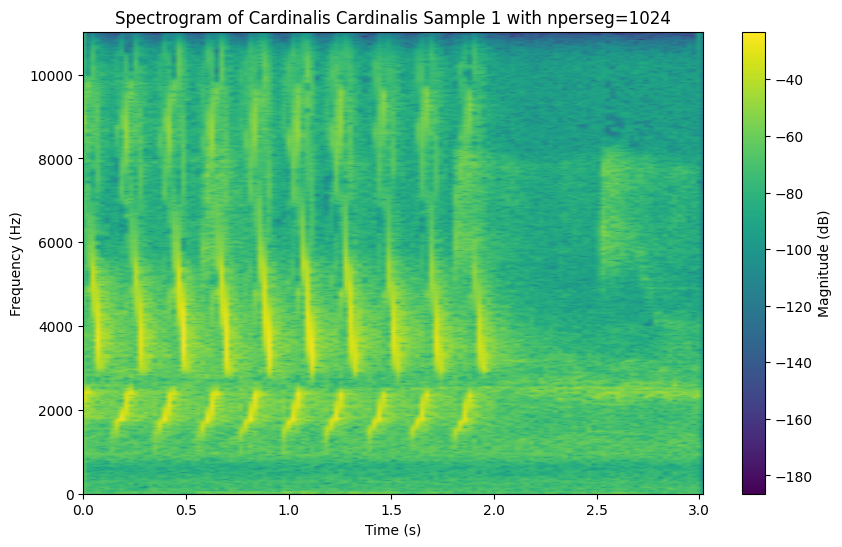

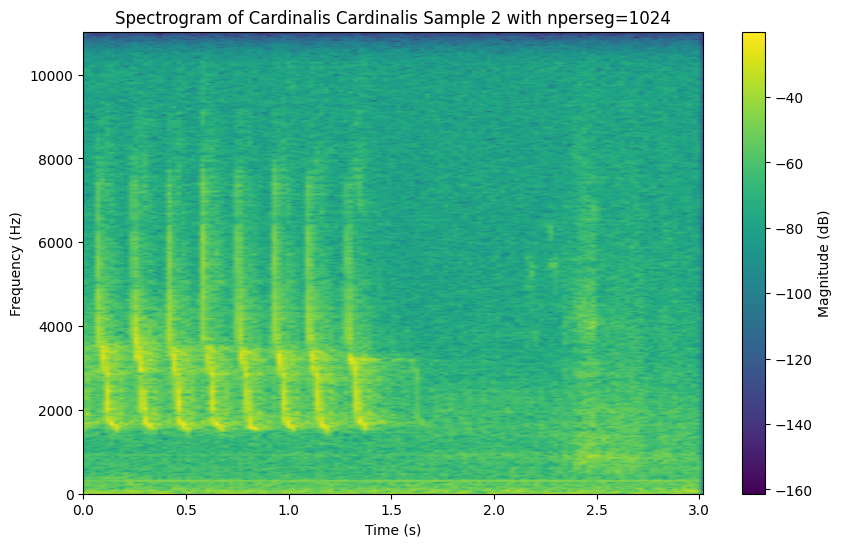

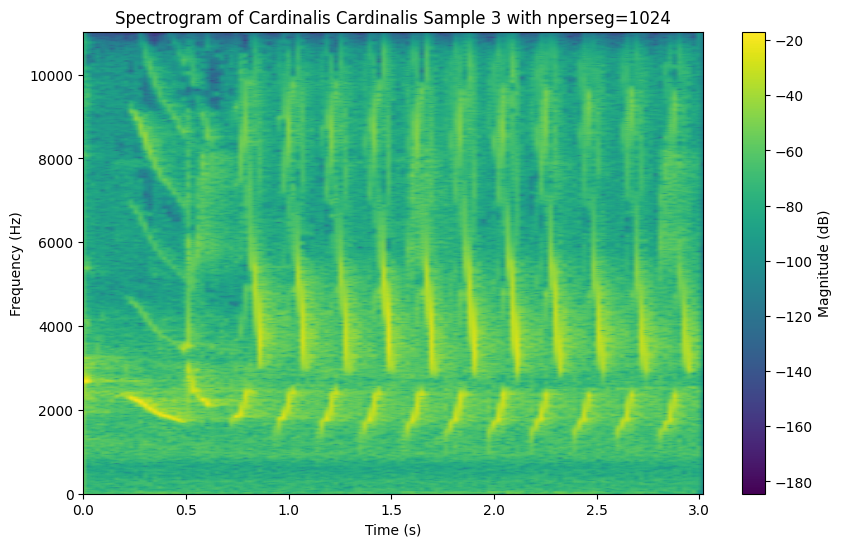

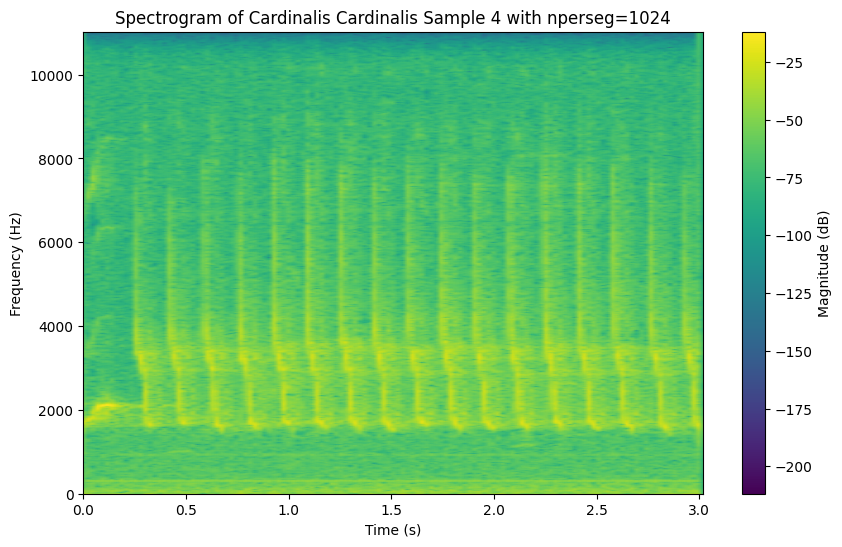

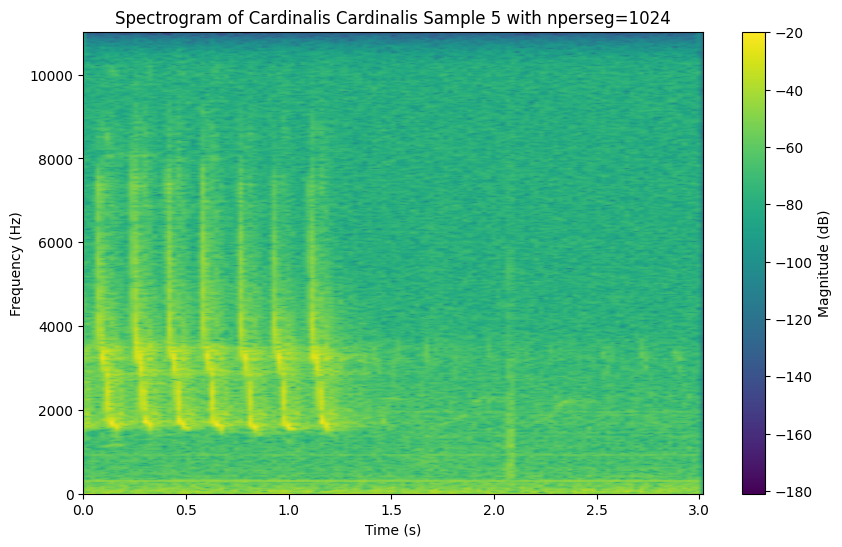

In [ ]:
# STFT on the Cardinalis Cardinalis
for idx, (audio_data, sample_rate) in enumerate(samples["Cardinalis Cardinalis"]):
    title = f"Cardinalis Cardinalis Sample {idx + 1} with nperseg=1024"
    plot_spectrogram(audio_data, sample_rate, title, nperseg=1024)



### **Cardinalis Cardinalis multiple nperseg**

In [40]:
# Define the function to plot the spectrogram with different nperseg values
def plot_spectrogram_comparison(audio_data, sample_rate):
    # Define the nperseg values to compare
    nperseg_values = [512, 1024, 2048]
    
    # Create a figure with subplots for each nperseg value
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    # Loop through each nperseg value
    for i, nperseg in enumerate(nperseg_values):
        # Compute the STFT for the current nperseg
        frequencies, times, Sxx = stft(audio_data, fs=sample_rate, window='hann', nperseg=nperseg)
        
        # Plot the spectrogram
        ax = axes[i]
        ax.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Sxx)), shading='gouraud')
        ax.set_title(f"Spectrogram of Sample 1 with nperseg={nperseg}")
        ax.set_xlabel("Time (s)")
        if i == 0:
            ax.set_ylabel("Frequency (Hz)")
        
    # Add a color bar
    fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=-180, vmax=0), cmap="viridis"), ax=axes, label="Magnitude (dB)")
    plt.tight_layout()
    plt.show()

C:\Users\msi 1\AppData\Local\Temp\ipykernel_20928\2751353218.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


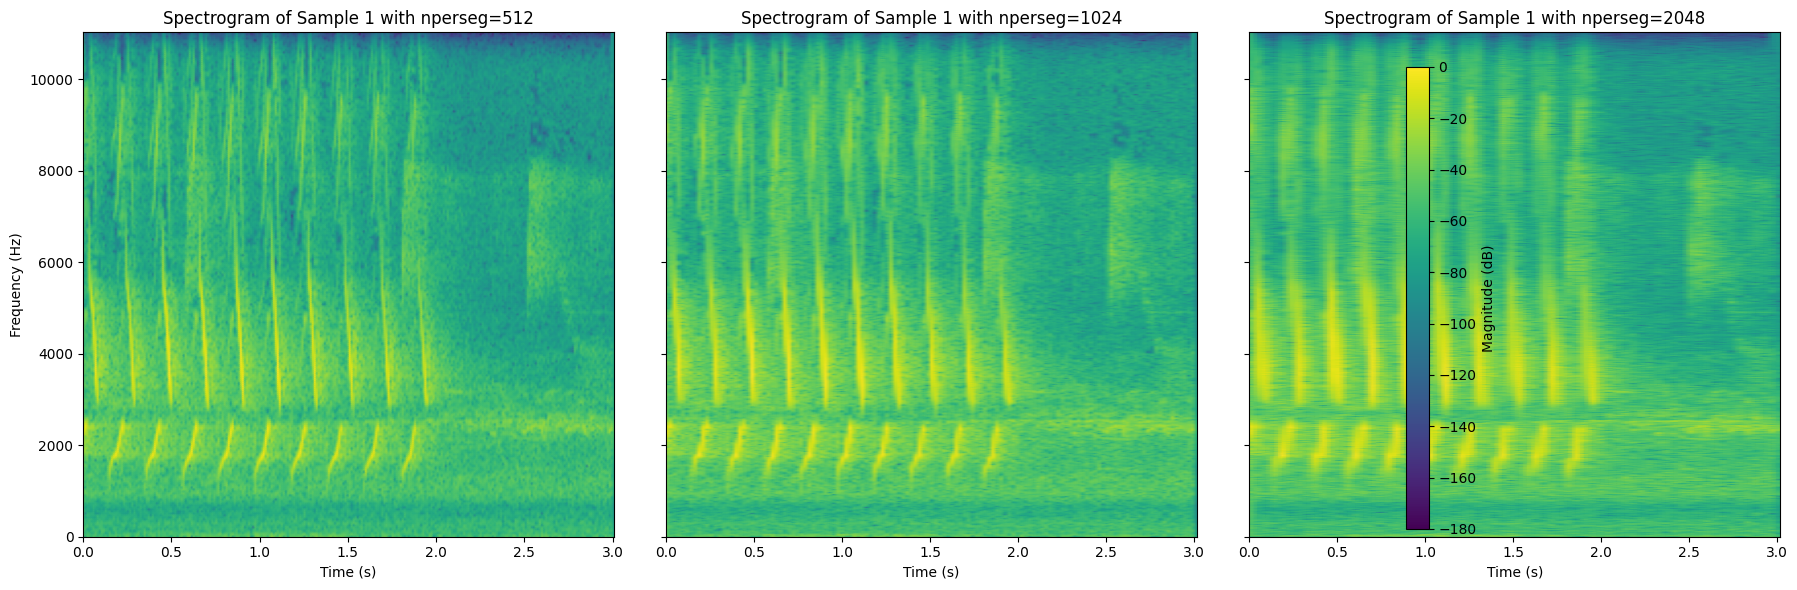

In [41]:
# Select the first sample of Cardinalis Cardinalis and plot the spectrogram comparison
audio_data, sample_rate = samples["Cardinalis Cardinalis"][0]
plot_spectrogram_comparison(audio_data, sample_rate)

#### **Melospiza Melodia**

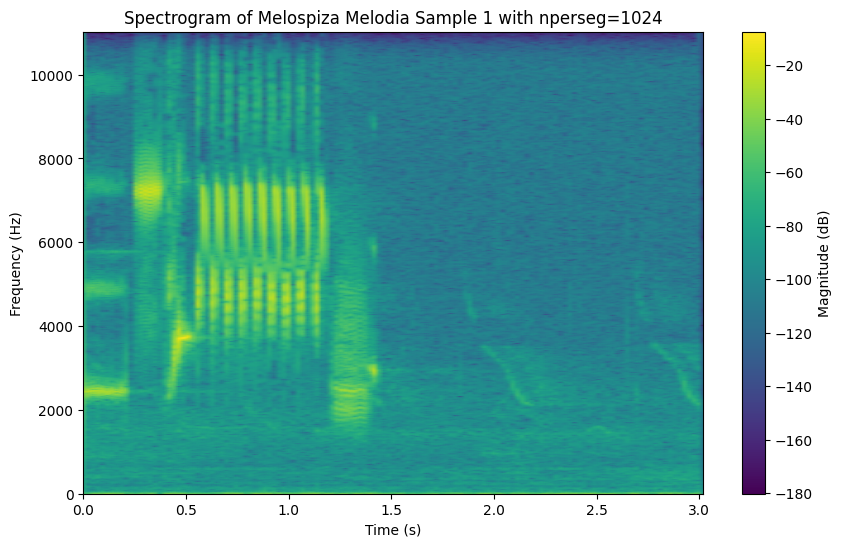

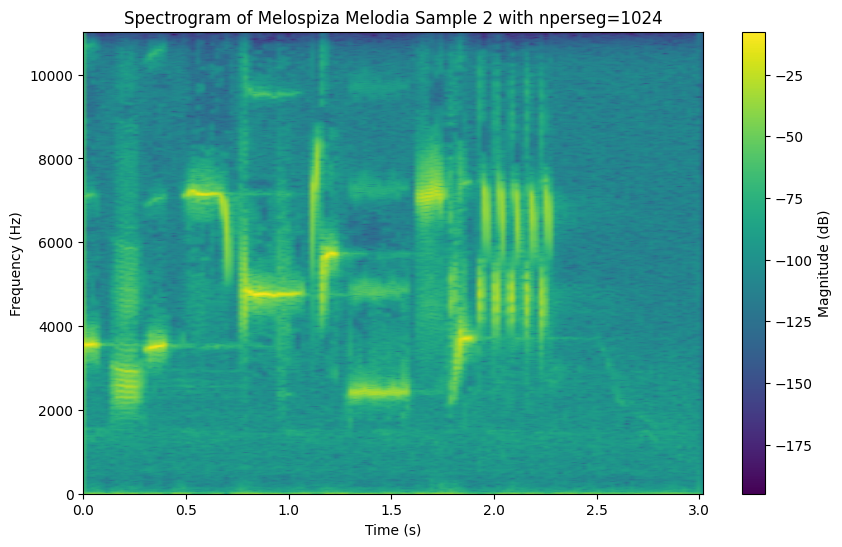

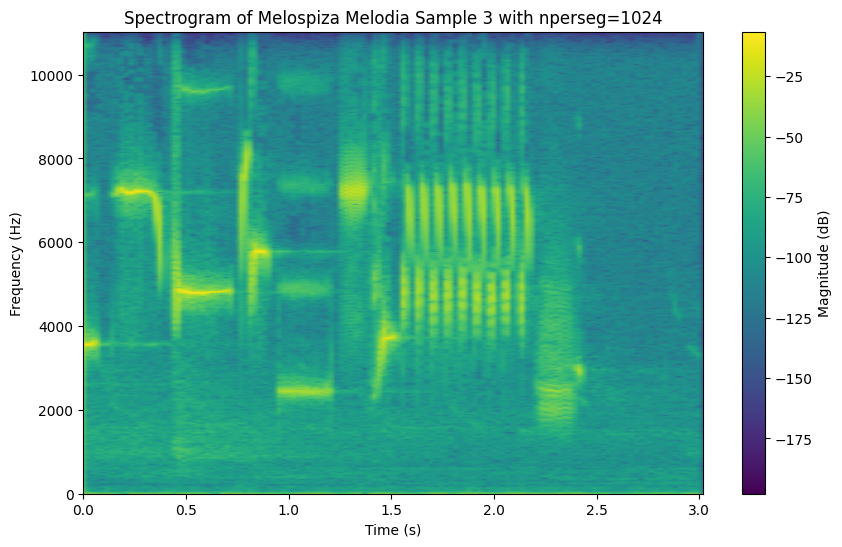

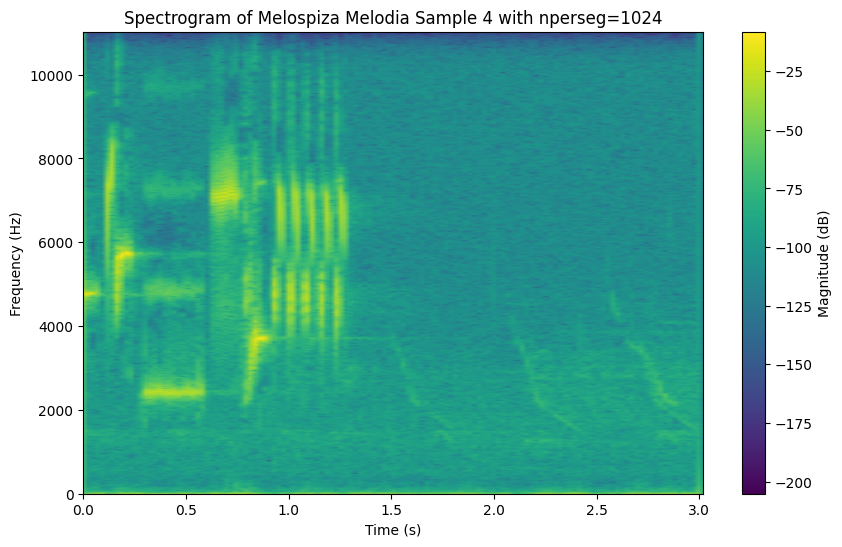

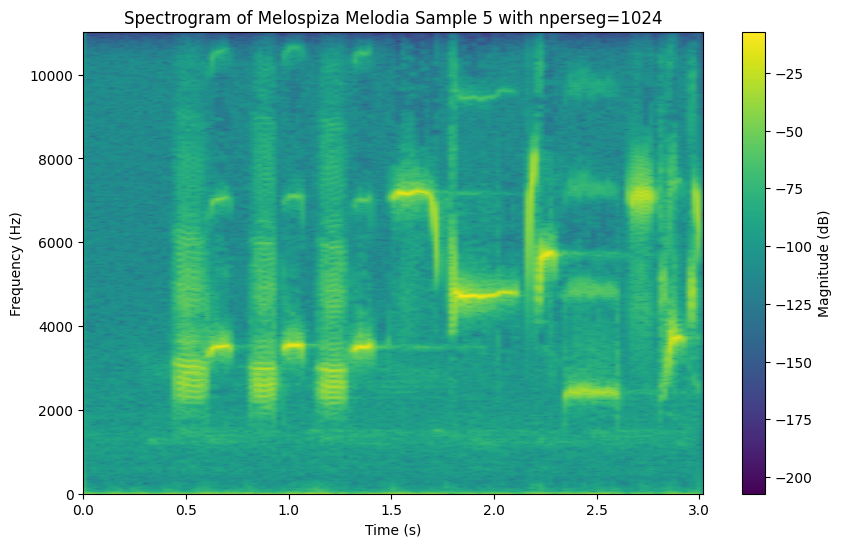

In [46]:
# STFT on the Melospiza Melodia
for idx, (audio_data, sample_rate) in enumerate(samples["Melospiza Melodia"]):
    title = f"Melospiza Melodia Sample {idx + 1} with nperseg=1024"
    plot_spectrogram(audio_data, sample_rate, title, nperseg=1024)
